# Multi-category classification with the iris dataset
Perform logistic regression in `scikit-learn` on the iris dataset.  The dependent variable is 4-dimensional, and the dependent variable is categorical with three possibl values.

## References

Dataset:
- [the `load_iris` function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) (scikit-learn)
- [logistic regression in scikit-learn](https://blog.goodaudience.com/classifying-flowers-using-logistic-regression-in-sci-kit-learn-38262416e4c6), an example with the iris dataset (Stephen Barter)

Statistics and machine learning:
- [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (scikit-learn)
- [logistic regression 3-classifier](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py) (scikit-learn)
- [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) (scikit-learn)
- [cross-entropy loss function for logistic regression](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression) (wikipedia)
- [logistic regression](https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html) (ml-cheatsheets)


Visualization:
- [matplotlib scatter](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html) (matplotlib)
- [matplotlib scatter plot with legend](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html) (matplotlib)
- [matplotlib scatter: color as a function of a third variable](https://stackoverflow.com/a/8204981/9472676) (stackoverflow)
- [matplotlib subplots adjust](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html) (matplotlib)
- [How to remove color bars?](http://matplotlib.1069221.n5.nabble.com/how-to-remove-colorbar-td21598.html) (some forum)

---
tags: statistics, logistic regression, classification, confusion matrix, iris dataset, visualization, scikit-learn

# Imports

In [1]:
from pathlib import Path
import itertools
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.datasets.base import load_data
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

# tl;dr

In [3]:
X, y = target_names = load_iris(return_X_y=True)
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
clf.fit(X, y)
print(f"Accuracy score of regressor: {clf.score(X, y):.2%}")
preds = clf.predict(X)
print("Confusion matrix:")
confusion_matrix(y, preds)

Accuracy score of regressor: 97.33%
Confusion matrix:


array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [4]:
type(X), X.shape, type(y), y.shape

(numpy.ndarray, (150, 4), numpy.ndarray, (150,))

# In more detail

# Load data

From the source code, with the parameter `return_X_y` set to `True`, the function [`load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) downloads file `iris.csv` to `dirname(__file__)/'data'/'iris.csv'`, where `dirname(__file__)` is the name of the directory containing the module `sklearn.datasets`.

In [6]:
X, y = load_iris(return_X_y=True)

# Inspect the data

In my case, the `scikit-learn` datasets are saved under:

In [18]:
datasets_path = Path.home()/'.pyenv/versions/pyml/lib/python3.7/site-packages/sklearn/datasets'
print("\n".join([item.name for item in datasets_path.glob("*") if item.is_dir() and ("_" not in item.name)]))

images
tests
descr
data


More specifically, the data itself is saved under

In [10]:
path = datasets_path/'data'
# print('\n'.join([item.name for item in path.glob("*")]))

while the **description** of the dataset is saved under

In [11]:
desc_path = datasets_path/'descr'
# print('\n'.join([item.name for item in desc_path.glob("*")]))

In particular, from the description `iris.rst` we learn that there are:
- 4 attributes:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
- 3 classes:
    - Iris-Setosa
    - Iris-Versicolour
    - Iris-Virginica

The names of the features are also hard encoded in the `load_iris()` function:

In [19]:
feature_names=['sepal length (cm)', 'sepal width (cm)',
               'petal length (cm)', 'petal width (cm)']

The metadata can be recovered from `load_iris` by leaving `return_X_y` set to `False`, in which case the function returns a `Bunch` with the data and metadata.  
Alternatively, by inspecting the source code of `load_iris()`, one can recover the target names with the `load_data()` function:

In [20]:
_, _, target_names = load_data(datasets_path, 'iris.csv')
classes = {i: name for i, name in enumerate(target_names)}
print('\n'.join([f"class {i}: {name}" for i, name in classes.items()]))

class 0: setosa
class 1: versicolor
class 2: virginica


Inspect the data directory `path` in a bit more detail.
This directory contains all data already downloaded with `scikit-learn`:

In [21]:
sum(1 for item in path.rglob("*")), set(item.suffix for item in path.rglob("*.*"))

(9, {'.csv', '.gz'})

In [ ]:
# print('\n'.join([str(item.name) for item in path.rglob("*.csv")]))

The function also returns the data in the form of `numpy` arrays:

In [23]:
type(X), X.shape, type(y), y.shape

(numpy.ndarray, (150, 4), numpy.ndarray, (150,))

They have numerical values, in particular the target values, which are the classes of irises:

In [27]:
n_samples = 10
np.vstack([
    np.hstack([X[:n_samples//2, :], y[:n_samples//2,None]]),
    np.hstack([X[-n_samples//2:, :], y[-n_samples//2:,None]])
])

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [6.7, 3. , 5.2, 2.3, 2. ],
       [6.3, 2.5, 5. , 1.9, 2. ],
       [6.5, 3. , 5.2, 2. , 2. ],
       [6.2, 3.4, 5.4, 2.3, 2. ],
       [5.9, 3. , 5.1, 1.8, 2. ]])

We verify that there are `3` classes:

In [28]:
set(y)

{0, 1, 2}

and `4` features, for `x` samples:

In [29]:
X.shape

(150, 4)

We have hard coded the feature names earlier:

In [30]:
print('\n'.join([f"feature {i}: {name}" for (i, name) in enumerate(feature_names)]))

feature 0: sepal length (cm)
feature 1: sepal width (cm)
feature 2: petal length (cm)
feature 3: petal width (cm)


# Visualizing the data
There are `4` features, hence we produce `4!/(2!)(2!)=6` (two-dimensional) scatter plots of the data:

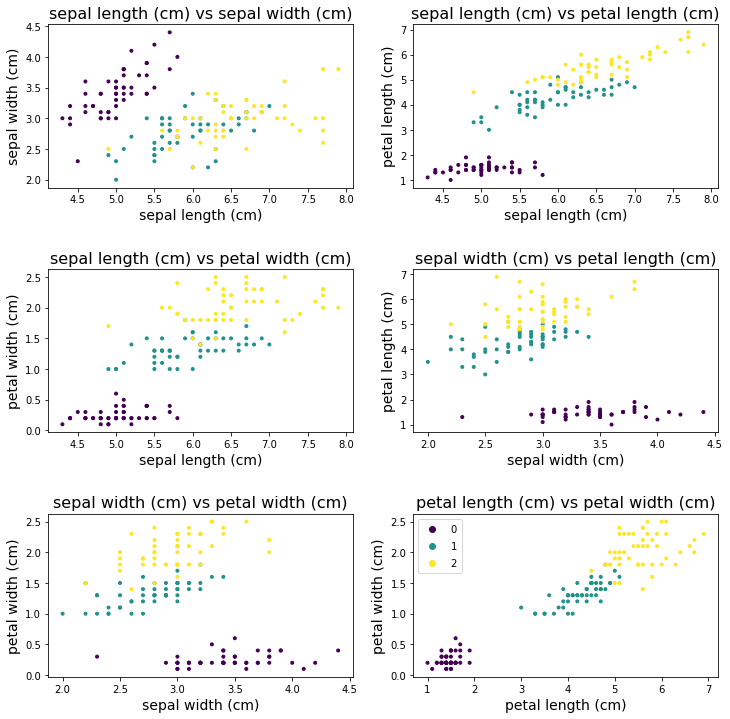

In [31]:
fig, axs = plt.subplots(3, 2, figsize=(12, 3*4))
axs = axs.ravel()
for ax, (i, j) in zip(axs, list(itertools.combinations(range(4), 2))):
    scatter = ax.scatter(X[:,i], X[:,j], marker='.', c=y)
    plt.legend(*scatter.legend_elements(prop='colors'))
    ax.set_xlabel(feature_names[i], fontsize=14)
    ax.set_ylabel(feature_names[j], fontsize=14)
    ax.set_title(f"{feature_names[i]} vs {feature_names[j]}", fontsize=16)
    
plt.subplots_adjust(hspace=.5)

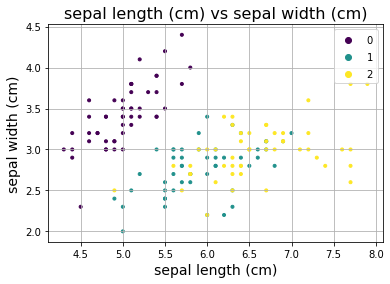

In [32]:
fig, ax = plt.subplots()
i, j = 0, 1

scatter = ax.scatter(X[:,i], X[:,j], marker='.', c=y)

ax.set_xlabel(feature_names[i], fontsize=14)
ax.set_ylabel(feature_names[j], fontsize=14)
ax.set_title(f"{feature_names[i]} vs {feature_names[j]}", fontsize=16)
plt.legend(*scatter.legend_elements())
ax.grid();

# Fit logistic regressor
Since the dataset is distributed over several classes, use the cross-entropy loss function by setting `multi_class` to `multinomial` (following the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)).

In [33]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=1000)
clf.fit(X, y);

# Predictions and score

Calculate predictions for the entire dataset

In [34]:
preds = clf.predict(X)

and evaluate the score of the classifier:

In [35]:
print(f"Accuracy score of regressor: {clf.score(X, y):.2%}")

Accuracy score of regressor: 97.33%


For each sample, the regressor has calculated a probability of it belonging to each of the three classes:

In [36]:
probs = clf.predict_proba(X)

Randomly select a subset of the data:

In [37]:
n_samples = 10
idxs = np.arange(X.shape[0])
np.random.shuffle(idxs)
idxs = idxs[:n_samples]

Look at the predictions

In [38]:
preds[idxs]

array([0, 2, 1, 1, 1, 2, 1, 2, 1, 0])

the corresponding probabilities:

In [39]:
probs[idxs]

array([[9.78622787e-01, 2.13772030e-02, 9.69926207e-09],
       [1.69134713e-05, 1.42011626e-01, 8.57971460e-01],
       [8.50299664e-03, 9.35127227e-01, 5.63697766e-02],
       [2.70880143e-02, 9.28485786e-01, 4.44261997e-02],
       [3.77844977e-03, 7.16447736e-01, 2.79773814e-01],
       [5.57186258e-05, 1.22896031e-01, 8.77048250e-01],
       [1.99172359e-02, 9.38091092e-01, 4.19916725e-02],
       [3.02818196e-04, 2.10400042e-01, 7.89297140e-01],
       [6.99171079e-03, 8.60122128e-01, 1.32886161e-01],
       [9.68346394e-01, 3.16535626e-02, 4.32664451e-08]])

For each row, the column index with highest probability determines the class of the prediction:

In [40]:
np.argmax(probs[idxs], axis=1)

array([0, 2, 1, 1, 1, 2, 1, 2, 1, 0])

We can verify this by inspection for a small subset, or have `numpy` do the checking for us for all samples:

In [41]:
(np.argmax(probs, axis=1) == preds).all()

True

# Analyzing predictions in greater detail

Look at the confusion matrix:

In [45]:
conf_mat = confusion_matrix(y, preds)
conf_mat

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

The sum of the off-diagonal entries give the number of incorrect classifications:

In [48]:
conf_mat.sum() - np.diagonal(conf_mat).sum()

4

Inspect the data as a `pandas` dataframe:

In [43]:
df = pd.read_csv(path/'iris.csv', header=0)
df.columns=['sepal length (cm)', 'sepal width (cm)',
            'petal length (cm)', 'petal width (cm)',
           'target']
df['prediction'] = preds
df['correct'] = df['target'] == df['prediction']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,prediction,correct
0,5.1,3.5,1.4,0.2,0,0,True
1,4.9,3.0,1.4,0.2,0,0,True
2,4.7,3.2,1.3,0.2,0,0,True
3,4.6,3.1,1.5,0.2,0,0,True
4,5.0,3.6,1.4,0.2,0,0,True


The number of incorrect classifications should equal the total of the off-diagonal entries in the confusion matrix above:

In [44]:
len(df) - df['correct'].sum()

4

Calculate the success rate per class:

In [49]:
dh = df.groupby('target')['correct'].value_counts().to_frame().rename(columns={'correct': 'count'}).reset_index()
dh = pd.merge(
    left=dh,
    right=dh.groupby('target')[['count']].sum().rename(columns={'count': 'total'}),
    on='target',
    how='left'
)
dh['percentage'] = 100 * dh['count']/dh['total']
dh = dh[dh['correct']][['target', 'percentage']]
dh.rename(columns={'target': 'class'}, inplace=True)
dh

,class,percentage
0,0,100.0
1,1,94.0
3,2,98.0


# Visualizing incorrectly classified samples

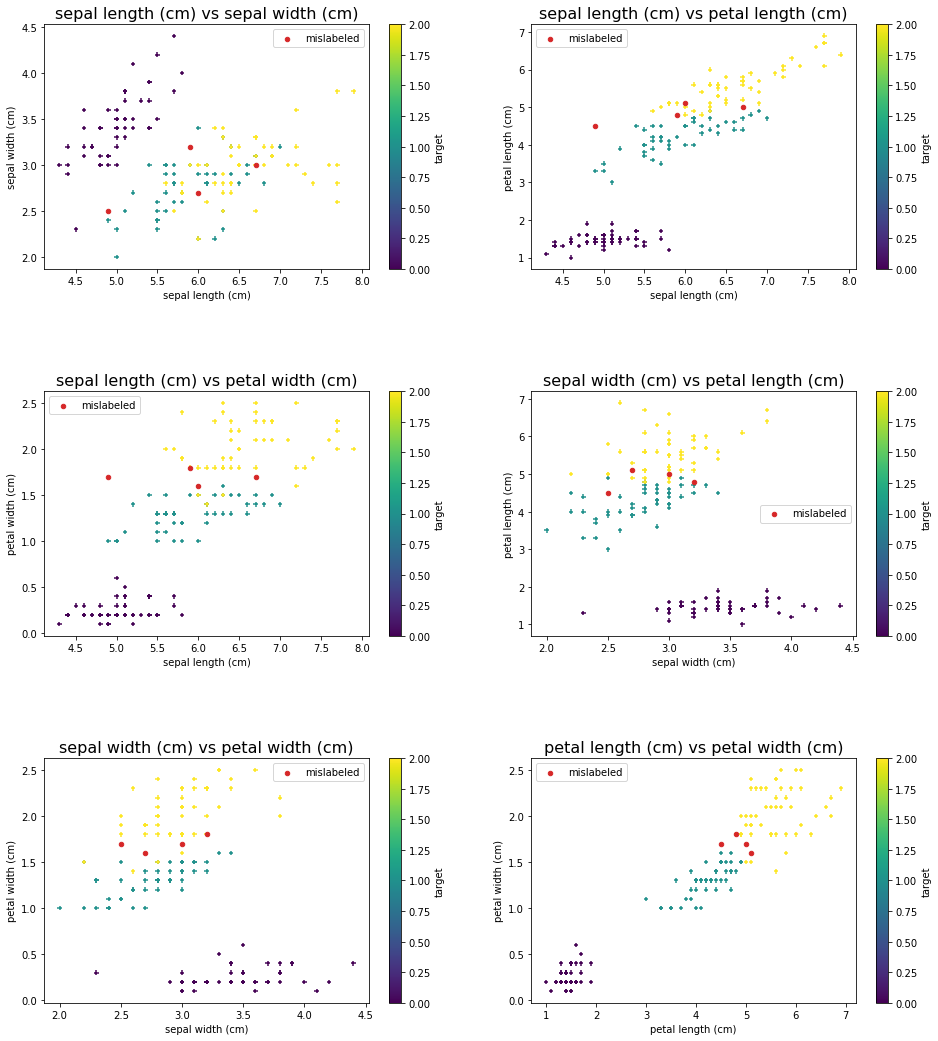

In [50]:
fig, axs = plt.subplots(3, 2, figsize=(16, 3*6))
axs = axs.ravel()
for ax, (i, j) in zip(axs, list(itertools.combinations(range(4), 2))):
    df[df['correct']].plot.scatter(x=feature_names[i], y=feature_names[j], c='target', cmap='viridis', marker='+', ax=ax)
    df[~df['correct']].plot.scatter(x=feature_names[i], y=feature_names[j], color='tab:red', marker='o', ax=ax, label='mislabeled')
    ax.set_title(f"{feature_names[i]} vs {feature_names[j]}", fontsize=16)

plt.subplots_adjust(hspace=.5)